In [8]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
import os, sys
import SimpleITK as sitk
from tqdm import tqdm
from os.path import expanduser
HOME = expanduser("~")

#%matplotlib inline

In [46]:
DIR = os.path.join(HOME, 'programming','dk39')
ORIENTED = os.path.join(DIR, 'preps', 'oriented')
ALIGNED = os.path.join(DIR, 'preps', 'aligned')
INPUT = ORIENTED
files = sorted(os.listdir(ORIENTED))

In [28]:
def simple_resample(fixed_image, moving_image):
    return  sitk.Elastix(fixed_image, moving_image)

In [50]:
# create some empty lists
img_inputs = []
img_outputs = []
file_inputs = []
files = sorted(os.listdir(ORIENTED))

# the first image is aligned to itself
movingPath = os.path.join(INPUT, files[0])
fixedPath = os.path.join(INPUT, files[0])
fixed_image =  sitk.ReadImage(fixedPath, sitk.sitkFloat32)
moving_image = sitk.ReadImage(movingPath, sitk.sitkFloat32) 

result_image = simple_resample(fixed_image, moving_image)
file_inputs.append(files[0])
img_outputs.append(sitk.GetArrayFromImage(result_image))
# 2nd
movingPath = os.path.join(INPUT, files[1])
fixedPath = os.path.join(INPUT, files[0])
fixed_image =  result_image
moving_image = sitk.ReadImage(movingPath, sitk.sitkFloat32) 

result_image = simple_resample(fixed_image, moving_image)
file_inputs.append(files[1])
img_outputs.append(sitk.GetArrayFromImage(result_image))
# 3rd
movingPath = os.path.join(INPUT, files[2])
fixedPath = os.path.join(INPUT, files[1])
fixed_image =  result_image
moving_image = sitk.ReadImage(movingPath, sitk.sitkFloat32) 

result_image = simple_resample(fixed_image, moving_image)
file_inputs.append(files[2])
img_outputs.append(sitk.GetArrayFromImage(result_image))
# 4th
movingPath = os.path.join(INPUT, files[3])
fixedPath = os.path.join(INPUT, files[2])
fixed_image =  result_image
moving_image = sitk.ReadImage(movingPath, sitk.sitkFloat32) 

result_image = simple_resample(fixed_image, moving_image)
file_inputs.append(files[3])
img_outputs.append(sitk.GetArrayFromImage(result_image))




# create output
OUTPUT = ALIGNED
dels = os.listdir(OUTPUT)
for d in dels:
    os.unlink(os.path.join(OUTPUT, d))

for i, img in enumerate(img_outputs):   
    
    filename = '{}_{}'.format(str(i).zfill(4), file_inputs[i])
    outfile = os.path.join(OUTPUT, filename)
    flat = img.flatten()
    fmax = int(flat.max())
    fmin = int(flat.min())
    flat = flat + abs(fmin)
    img = np.reshape(flat, img.shape)    
    img[img <= 0] = 0
    io.imsave(outfile, img.astype('uint16'), check_contrast=False)
    img = None
print('done')

done


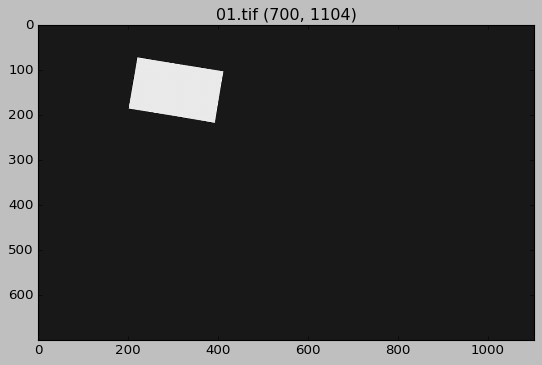

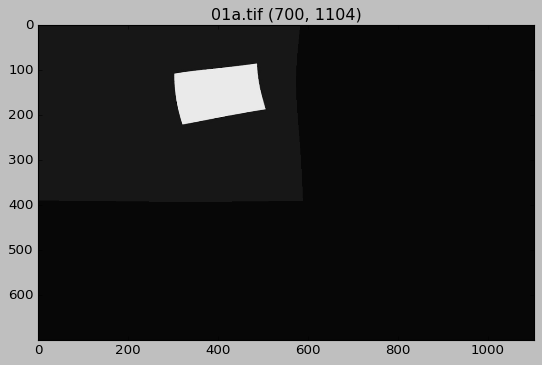

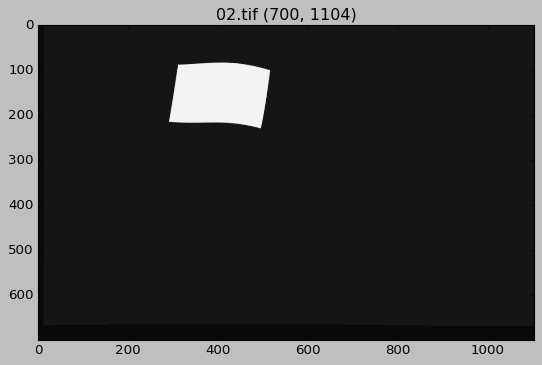

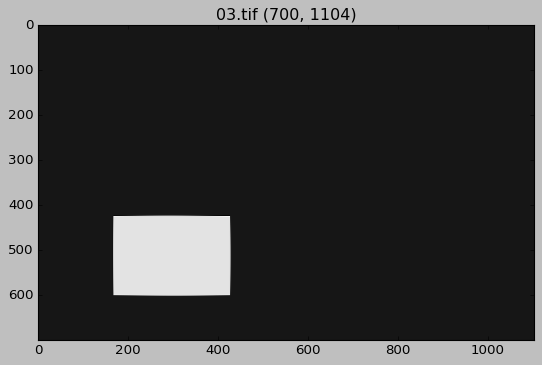

In [51]:
for name,file in zip(file_inputs, img_outputs):
    plt.style.use('classic')
    plt.figure()
    plt.title('{} {}'.format(name, file.shape))
    plt.imshow(file, cmap='gray')
    plt.show()

In [48]:
files

['01.tif',
 '01a.tif',
 '02.tif',
 '03.tif',
 '03a.tif',
 '04.tif',
 '05.tif',
 '06.tif',
 '07.tif',
 '08.tif',
 '09.tif',
 '09a.tif',
 '10.tif']